2


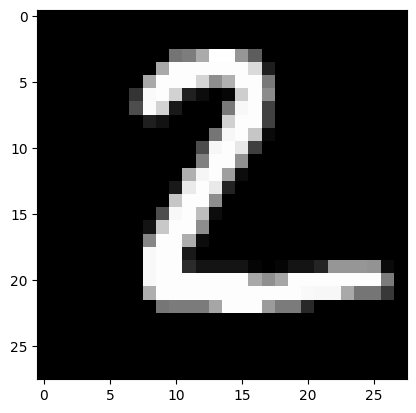

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def loadDataset(fileName, samples):
    x = []
    y = []
    train_data = pd.read_csv(fileName)
    y = np.array(train_data.iloc[0:samples, 0])
    x = np.array(train_data.iloc[0:samples, 1:])
    return x,y
 
x,y=loadDataset("Nmist/mnist_test.csv",500)

digit = x[0]
label = y[0]
print(label)
digit_pixels = digit.reshape(28, 28)
digit_pixels = digit_pixels.astype(np.uint8)

plt.imshow(digit_pixels, cmap='gray')
plt.show()



In [29]:
import mahotas
mahotas.features.zernike_moments(digit_pixels, 10, degree=8)

array([0.31830989, 0.05277588, 0.12970396, 0.02883552, 0.11131308,
       0.17264649, 0.22984629, 0.06961921, 0.05129823, 0.0345861 ,
       0.12810697, 0.06274317, 0.06829393, 0.07689442, 0.08393741,
       0.02904713, 0.04173223, 0.09189385, 0.01787331, 0.02370978,
       0.0138179 , 0.05506382, 0.10405088, 0.02618112, 0.05500726])

[0.31830989 0.3391197  0.13915167 0.07459751 0.12495273 0.35936914
 0.09139161 0.29381442 0.50434996 0.19319214 0.39989938 0.22968322
 0.27114823 0.24577564 0.38495318 0.33267978 0.41436876 0.31018139
 0.44828077 0.75442957 0.44437472 0.69549472 0.48868096 0.50720802
 0.68257617]


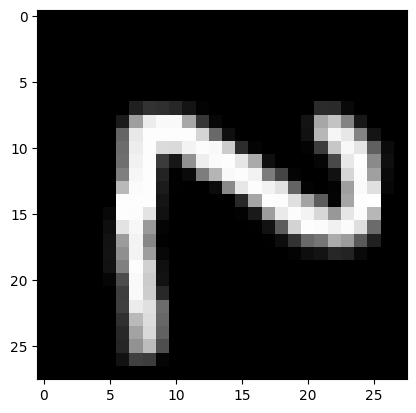

In [12]:

import cv2
def rotar(imagen, angulo_rotacion):
    alto, ancho = imagen.shape[:2]
    centro = (ancho // 2, alto // 2)
    matriz_rotacion = cv2.getRotationMatrix2D(centro, angulo_rotacion, 1.0)
    imagen_rotada = cv2.warpAffine(imagen, matriz_rotacion, (ancho, alto))
    return imagen_rotada

angulo_rotacion = 268
img = rotar(digit_pixels, angulo_rotacion)
plt.imshow(img, cmap='gray')

features = mahotas.features.zernike_moments(digit_pixels, 2, degree=8)
print(features)

In [40]:
def loadDataset(fileName, samples):
    x = []
    y = []
    train_data = pd.read_csv(fileName)
    y = np.array(train_data.iloc[0:samples, 0])
    x = np.array(train_data.iloc[0:samples, 1:])
    return x,y
 
x,y=loadDataset("Nmist/mnist_test.csv",10000)


data = []

for i in range(len(x)):
    digit_pixels = x[i].reshape(28, 28)
    digit_pixels = digit_pixels.astype(np.uint8)
    features = mahotas.features.zernike_moments(digit_pixels, 11, degree=8)
    label = y[i]
    data.append(list(features) + [label])

columns = [f'Zernike_{i}' for i in range(len(features))] + ['Label']
df = pd.DataFrame(data, columns=columns)
df.to_csv('Zernike.csv', index=False)
df



,Zernike_0,Zernike_1,Zernike_2,Zernike_3,Zernike_4,Zernike_5,Zernike_6,Zernike_7,Zernike_8,Zernike_9,...,Zernike_16,Zernike_17,Zernike_18,Zernike_19,Zernike_20,Zernike_21,Zernike_22,Zernike_23,Zernike_24,Label
0,0.31831,3.462864e-02,0.072125,0.240799,0.171948,0.173780,0.048903,0.221255,0.034397,0.215967,...,0.271252,0.071776,0.114887,0.037261,0.087026,0.137295,0.122098,0.133369,0.082448,2
1,0.31831,6.910739e-17,0.403571,0.268981,0.086786,0.030520,0.287692,0.388575,0.230268,0.037625,...,0.041238,0.033351,0.075964,0.074839,0.296846,0.294315,0.312735,0.311246,0.175846,1
2,0.31831,1.543634e-16,0.241059,0.095193,0.018107,0.061068,0.394134,0.071297,0.050275,0.045899,...,0.057847,0.041752,0.046199,0.035857,0.033728,0.147588,0.054034,0.034528,0.036302,0
3,0.31831,8.852848e-17,0.299112,0.050694,0.112538,0.115331,0.128445,0.135342,0.086435,0.266745,...,0.300687,0.117883,0.081143,0.033466,0.037145,0.087175,0.196811,0.201907,0.073689,4
4,0.31831,4.018322e-17,0.435901,0.247521,0.037048,0.017788,0.263449,0.415092,0.190306,0.025712,...,0.028645,0.044021,0.025360,0.038196,0.275458,0.276581,0.266025,0.317859,0.105648,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0.31831,7.040997e-03,0.122553,0.169229,0.103862,0.093417,0.141689,0.206490,0.130365,0.210813,...,0.063076,0.186021,0.045470,0.054302,0.102154,0.075527,0.056459,0.112418,0.105501,2
9995,0.31831,6.412479e-17,0.141298,0.183443,0.177209,0.136065,0.233960,0.181417,0.039126,0.268307,...,0.174318,0.156339,0.034170,0.026518,0.044083,0.152305,0.072828,0.012310,0.038276,3
9996,0.31831,1.358175e-03,0.421962,0.128843,0.045591,0.103049,0.215937,0.058752,0.083447,0.052601,...,0.112930,0.207639,0.165612,0.134200,0.003524,0.186144,0.019585,0.049809,0.030859,4
9997,0.31831,3.222044e-02,0.386004,0.149566,0.131174,0.085246,0.113411,0.179735,0.100244,0.163765,...,0.080568,0.128835,0.058410,0.082539,0.063181,0.307089,0.016271,0.058243,0.089109,5


In [41]:
from sklearn.model_selection import train_test_split

X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el valor de k

# Entrenar el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)
# Predecir etiquetas en el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar el rendimiento del modelo (por ejemplo, utilizando la precisión)
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Precisión del modelo: {accuracy}')
print(report)



Precisión del modelo: 0.8305
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       205
           1       0.95      0.99      0.97       218
           2       0.69      0.74      0.72       192
           3       0.85      0.85      0.85       201
           4       0.85      0.77      0.81       205
           5       0.86      0.68      0.76       198
           6       0.72      0.78      0.75       186
           7       0.84      0.89      0.86       193
           8       0.88      0.84      0.86       191
           9       0.75      0.82      0.78       211

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



In [ ]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = svm.SVC(decision_function_shape='ovr')  # OvA

# Entrenar el modelo
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Informe de clasificación
class_report = classification_report(y_test, y_pred)
print("Informe de clasificación:")
print(class_report)

